In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks

In [2]:
data_src = r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif"
ref_src = r"E:\data\my data\Arrhythmic imaging April 2024\2024-04-05 17.46.44 vid normal fit post-caffeine\ref-frames-2024-04-05-17.46.39\*tif"
ref_period = 158.758804

In [3]:
oog = OG.BasicOpticalGating()#.default()
oog.sequence_manager.set_source(data_src)
#oog.sequence_manager.set_reference_sequence(ref_src)
#oog.sequence_manager.reference_period = ref_period
oog.settings["pi_space"] = True
oog.settings["include_reference_frames"] = True
oog.run()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting reference sequence
Reference period: 35.77851226661945; Reference indices: [8, 48]
Getting SADs
Getting phases


In [4]:
data = OG.SequenceManager.load_tif(oog.sequence_manager.sequence_src)

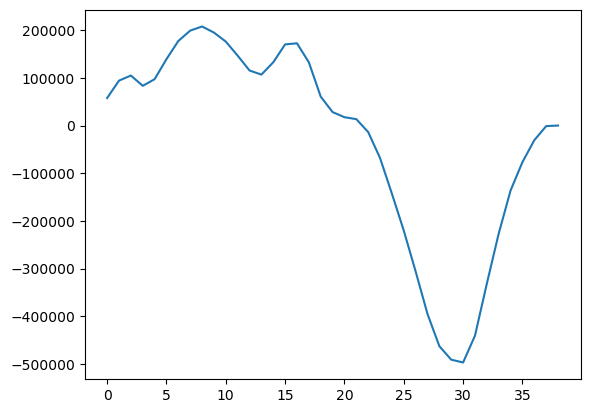

In [5]:
ref_diffs = np.sum(np.abs(np.diff(oog.sequence_manager.reference_sequence.astype(np.int8), axis = 0)), axis=(1, 2))
plt.plot(np.cumsum(ref_diffs - np.mean(ref_diffs)))

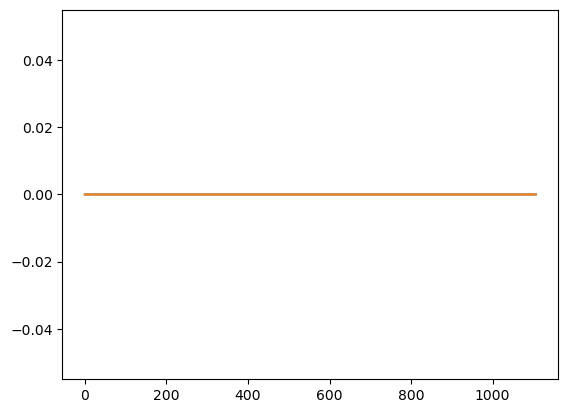

In [6]:
plt.plot(oog.drifts)

In [7]:
diffs = np.sum(np.abs(np.diff(data.astype(np.int8), axis=0)), axis = (1,2))

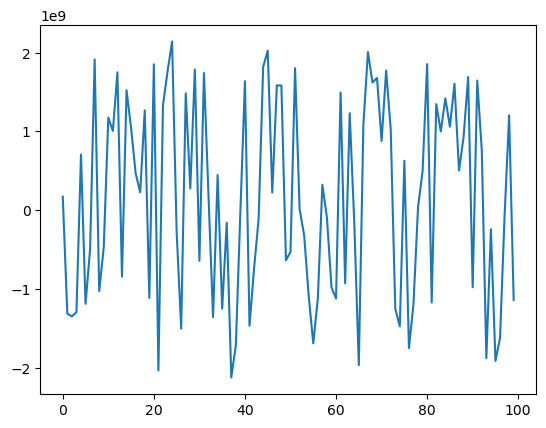

In [8]:

plt.plot(np.correlate(np.cumsum(diffs), np.cumsum(ref_diffs), mode="full")[0:100])

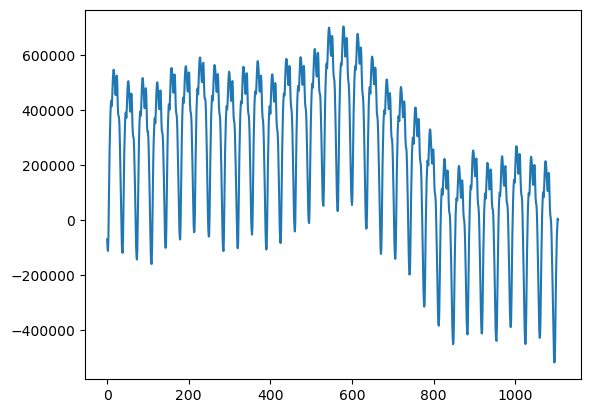

In [9]:
plt.plot(np.cumsum(diffs - np.mean(diffs)))

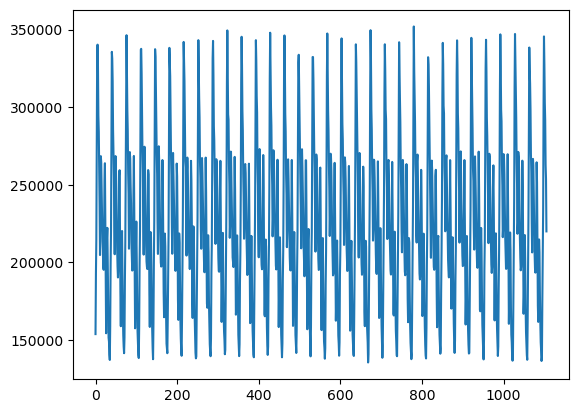

In [10]:
plt.plot(diffs)

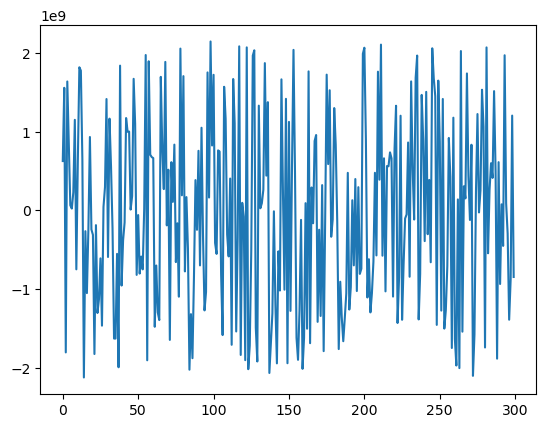

In [11]:
plt.plot(np.correlate(diffs, ref_diffs, mode="full")[0:300])

In [12]:
diffs_subtracted = np.cumsum(diffs - np.mean(diffs))
ref_diffs_suctracted = np.cumsum(ref_diffs - np.mean(ref_diffs))

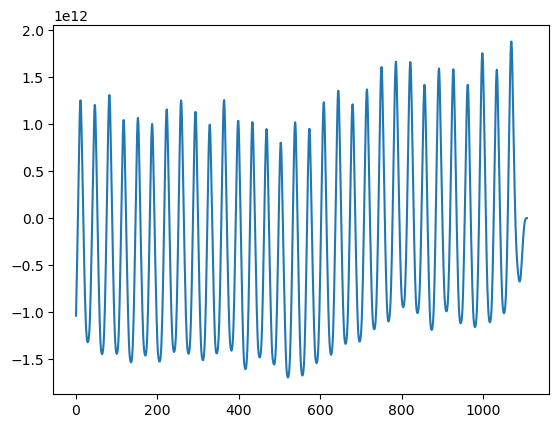

In [13]:
# Do correlation between ref_diffs and diffs
correlation = np.correlate(diffs_subtracted, ref_diffs_suctracted, mode="full")
plt.plot(correlation[35:6000])
plt.show()

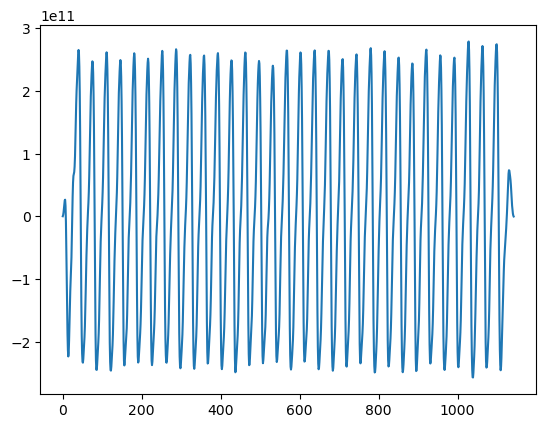

In [14]:
plt.plot(np.diff(correlation))

ValueError: x and y must be the same size

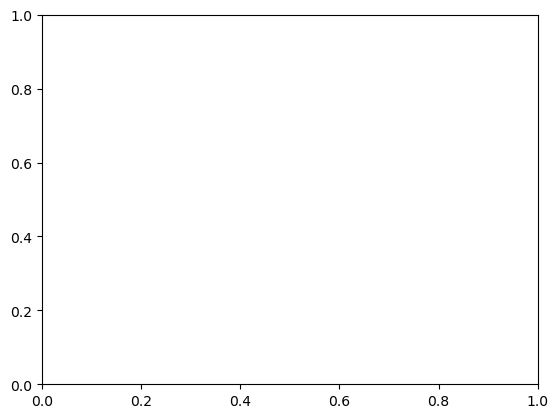

In [15]:
plt.scatter(oog.phases[1::], correlation[155:-155], s = 5, c = range(len(oog.phases[1::])))

ValueError: x and y must be the same size

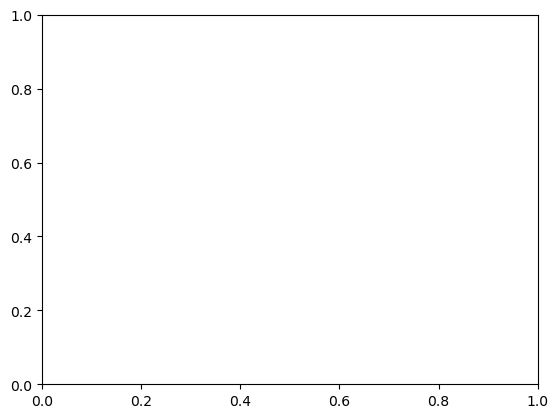

In [16]:
plt.scatter(oog.phases[1::], np.diff(correlation[155:-154]), s = 5, c = range(len(oog.phases[1::])))

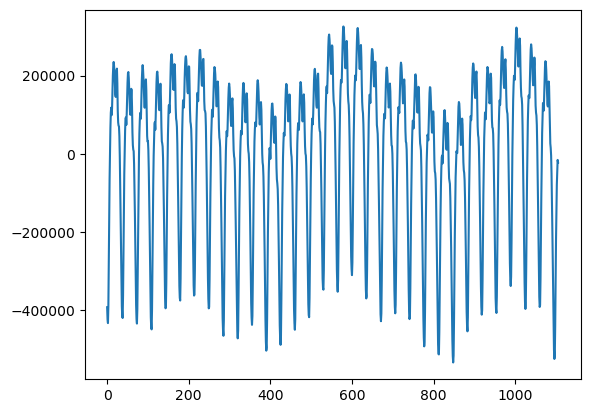

In [17]:
diffs_cumsum = np.cumsum(diffs - np.mean(diffs))

# Subtract a polynomial fit to remove the baseline
baseline = np.polyfit(np.arange(len(diffs_cumsum)), diffs_cumsum, 5)
diffs_cumsum -= np.polyval(baseline, np.arange(len(diffs_cumsum)))

plt.plot(diffs_cumsum)
plt.show()

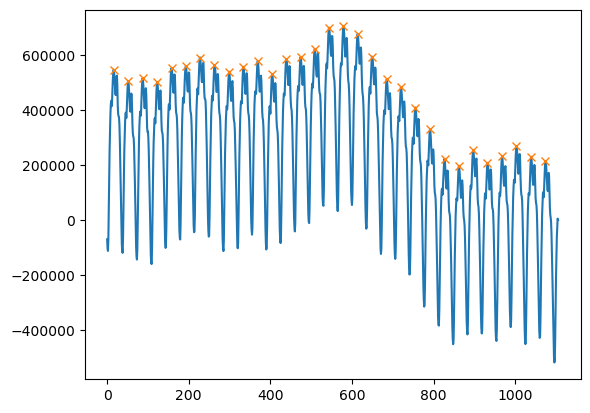

In [18]:
# Find peaks of cumulatitive sum of differences minus mean
diffs_cumsum = np.cumsum(diffs - np.mean(diffs))

peaks, _ = find_peaks(diffs_cumsum, height=1000, distance=10, prominence=10000)

plt.plot(diffs_cumsum)
plt.plot(peaks, diffs_cumsum[peaks], "x")
plt.show()

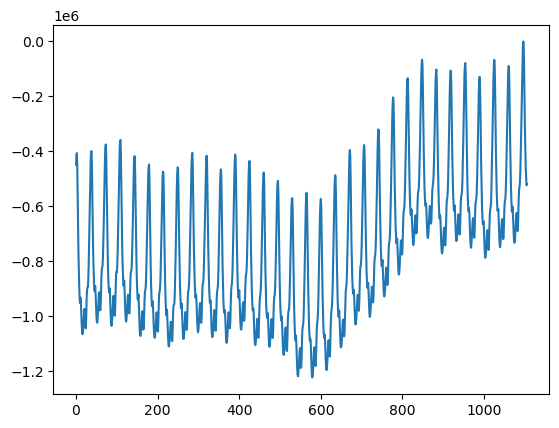

In [27]:
# Find peaks of cumulatitive sum of differences minus mean
#diffs_cumsum = -np.cumsum(diffs - np.mean(diffs))

diffs_cumsum -= np.min(diffs_cumsum)
peaks, _ = find_peaks(-diffs_cumsum, height=100000, distance=20, prominence=1000)

plt.plot(-diffs_cumsum)
plt.plot(peaks, -diffs_cumsum[peaks], "x")
plt.show()

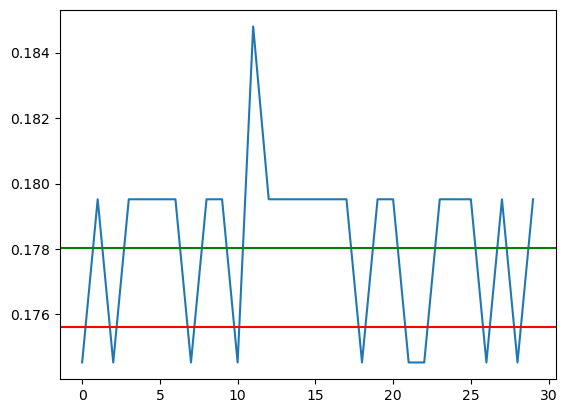

In [22]:
plt.plot(2 * np.pi / np.diff(peaks))
plt.axhline(2 * np.pi / oog.sequence_manager.reference_period, color="red")
plt.axhline(np.mean(oog.delta_phases), color="green")
